In [44]:
import sys
# not best practice, but makes it easier to import from subdirectory
sys.path.insert(0, './lib')

import experiment as exp
import model as m
import plot
import predict

import numpy as np
import matplotlib.pyplot as plt

import os
import torch

import umap
import matplotlib
from sklearn.preprocessing import StandardScaler

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

_ = plt.rcParams['axes.grid'] = False # turn off grid

%load_ext autoreload
%autoreload 2

device = torch.device('cuda:0')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# load experiment

Error loading trial TconvScaffoldIter2 ...skipping
[Errno 2] No such file or directory: 'experiments/iter_exps07_8iters/TconvScaffoldIter2/model.pickle'


Text(0, 0.5, 'Mean LL')

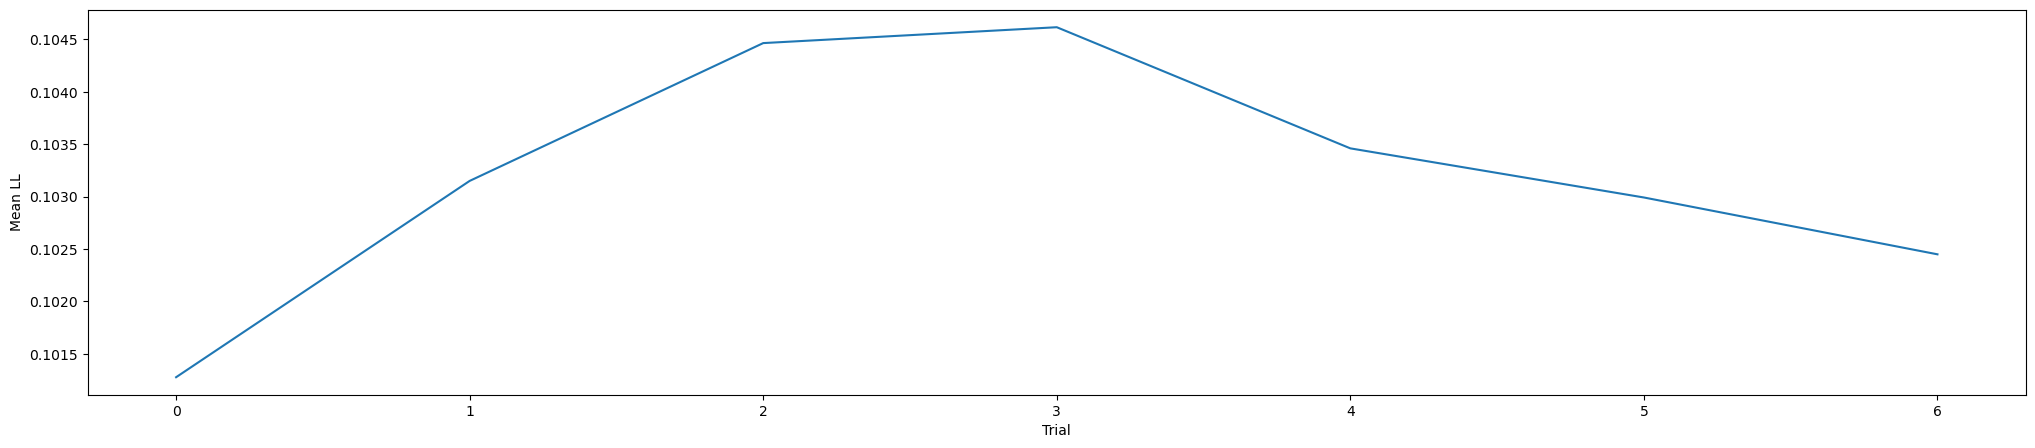

In [60]:
expts = ['expt04', 'expt06', 'expt07', 'expt09', 'expt11']
num_subunits = 12
num_inh = 6
num_iterses = [2,3,4,5,6,7,8]
#e = exp.load('iter_exps03', experiment_location='experiments', datadir='Mdata')
es = []
best_trials = []
for i in num_iterses:
    e = exp.load('iter_exps07_'+str(i)+'iters', experiment_location='experiments', datadir='Mdata')
    es.append(e)
    # add the trials with the best LLs to the list
    best_trials.append(e.trials[np.argmax([np.mean(trial.LLs) for trial in e.trials])])

# plot the mean LLs for the best_trials in a line chart
fig= plt.figure(figsize=(25,5))
plt.plot([np.mean(trial.LLs) for trial in best_trials])
plt.xlabel('Trial')
plt.ylabel('Mean LL')

In [66]:
es[1].trials_df

,trial_idx,model_name,expt,num_iter,num_filters,layer1_num_lags,name,trial,mean_LLs
0,0,TconvScaffoldIter,expt04+expt06+expt07+expt09+expt11,3,12,2,TconvScaffoldIter0,<experiment.Trial object at 0x7fbe22fea970>,0.098767
0,1,TconvScaffoldIter,expt04+expt06+expt07+expt09+expt11,3,12,2,TconvScaffoldIter1,<experiment.Trial object at 0x7fbe519dcbe0>,0.102395
0,2,TconvScaffoldIter,expt04+expt06+expt07+expt09+expt11,3,12,2,TconvScaffoldIter2,<experiment.Trial object at 0x7fbe217464c0>,0.086866
0,3,TconvScaffoldIter,expt04+expt06+expt07+expt09+expt11,3,12,2,TconvScaffoldIter3,<experiment.Trial object at 0x7fbe21da1bb0>,0.096638
0,4,TconvScaffoldIter,expt04+expt06+expt07+expt09+expt11,3,12,2,TconvScaffoldIter4,<experiment.Trial object at 0x7fbe21dad790>,0.103150


In [59]:
# print the reg_vals for the best_models
for trial in best_trials:
    trial.model.print_params('reg_vals')

core
0 {'d2xt': 0.0001, 'center': 0, 'bcs': {'d2xt': 1}}
1 {'activity': 0, 'd2xt': 0.0001, 'center': 0, 'bcs': {'d2xt': 1}}
readout
0 None
core
0 {'d2xt': 0.00010000000000000002, 'center': 0.0, 'bcs': {'d2xt': 1}}
1 {'activity': 0.006075861442805143, 'd2xt': 9.999999999999999e-05, 'center': 0.0, 'bcs': {'d2xt': 1}}
readout
0 None
core
0 {'d2xt': 0.0001, 'center': 0.0, 'bcs': {'d2xt': 1}}
1 {'activity': 0.02864197002493942, 'd2xt': 0.0001, 'center': 0.0, 'bcs': {'d2xt': 1}}
readout
0 None
core
0 {'d2xt': 0.0001, 'center': 0, 'bcs': {'d2xt': 1}}
1 {'activity': 0.005, 'd2xt': 0.0001, 'center': 0, 'bcs': {'d2xt': 1}}
readout
0 None
core
0 {'d2xt': 0.0001, 'center': 0.0, 'bcs': {'d2xt': 1}}
1 {'activity': 0.0, 'd2xt': 0.0001, 'center': 0.0, 'bcs': {'d2xt': 1}}
readout
0 None
core
0 {'d2xt': 0.0001, 'center': 0, 'bcs': {'d2xt': 1}}
1 {'activity': 0, 'd2xt': 0.0001, 'center': 0, 'bcs': {'d2xt': 1}}
readout
0 None
core
0 {'d2xt': 0.0001, 'center': 0, 'bcs': {'d2xt': 1}}
1 {'activity': 0.005, '

In [47]:
# # plot the mean LLs for all the trials in a line chart
# fig, ax = plt.subplots(figsize=(25,5))
# mean_LLs = [np.mean(trial.LLs) for trial in e.trials]
# max_LL = np.max(mean_LLs)
# # get the index of the max LL
# max_LL_idx = np.argmax(mean_LLs)
# # print the reg_vals for the trial with the max LL
# e.trials[max_LL_idx].model.print_params('reg_vals')
# 
# ax.plot(mean_LLs)
# 
# # put a horizontal dashed line at the max LL
# ax.axhline(y=np.max(mean_LLs), color='red', linestyle='--', alpha=0.5)
# # put an asterisk at the max LL as well
# ax.scatter(np.argmax(mean_LLs), np.max(mean_LLs), marker='*', s=100, color='r', label='max ['+str(max_LL)+']', alpha=0.5)
# 
# # put a vertical dashed line at x=4 and x=10
# ax.axvline(x=8, color='gray', linestyle='--', label='fixed', alpha=0.5)
# ax.axvline(x=32, color='k', linestyle='--', label='random', alpha=0.5)
# ax.axvline(x=90, color='g', linestyle='--', label='optimized', alpha=0.5)
# ax.legend()
# ax.set_xlabel('Trial')
# ax.set_ylabel('Mean LL')
# ax.set_title('mean LLs for model after 16 random samples, optimization for 50 steps')
# plt.show()

# plot matched filters

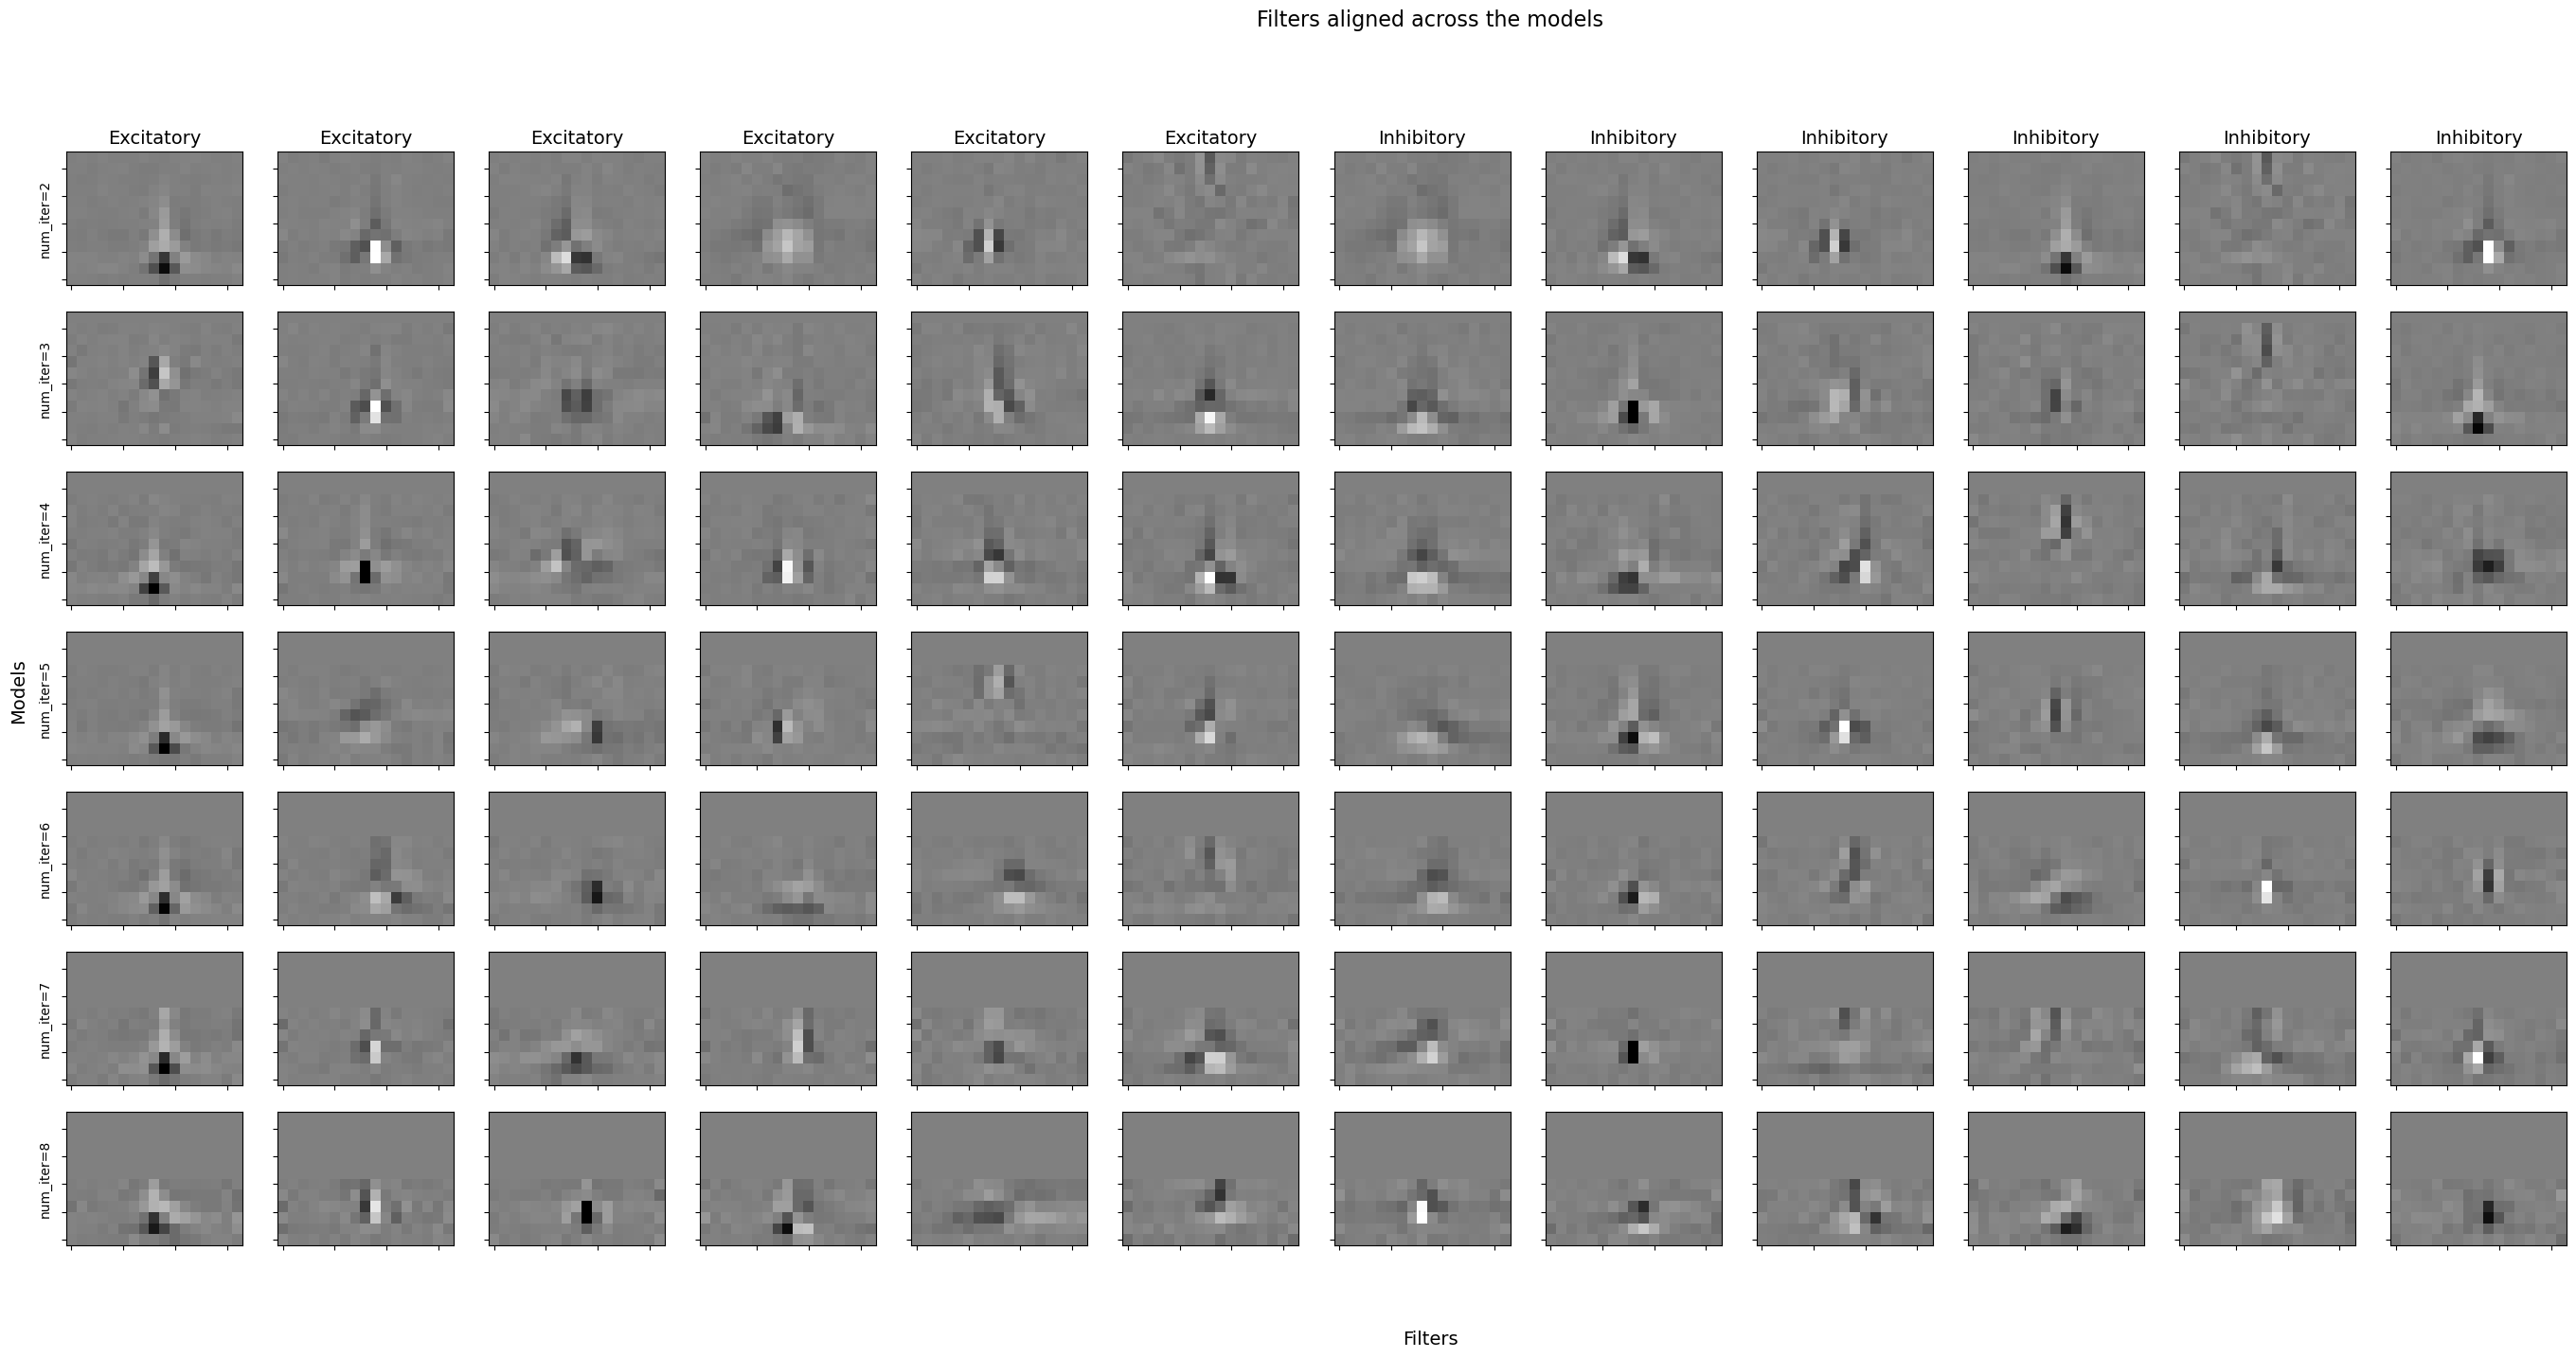

In [49]:
plot.plot_aligned_filters([trial.model for trial in best_trials], model_names=['num_iter='+str(i) for i in num_iterses], figsize=(30,15))

In [53]:
# get experiment boundaries (they all use the same dataset)
dataset = best_trials[0].dataset
expt_boundaries = np.concatenate([[0], np.cumsum(dataset.num_units)])
expt_boundaries

lazy loading dataset
Loading ['expt04', 'expt06', 'expt07', 'expt09', 'expt11']
Loading expt04
  Time embedding...
  Done.
Loading expt06
  Time embedding...
  Done.
Loading expt07
  Time embedding...
  Done.
Loading expt09
  Time embedding...
  Done.
Loading expt11
  Time embedding...
  Done.


array([  0,  35,  63,  91, 114, 139])

In [54]:
best_trials[1].model.networks[1].layers[0].weights.shape

(48, 36, 139)

In [55]:
# get the weights of the readout layer for the best models
# and just get the middle space-time filter
center_readout_weights = []
max_readout_weights = []
sum_readout_weights = []
readout_weights_by_neuron = []
for trial in best_trials:
    sum_neurons = np.sum(trial.model.networks[1].layers[0].weights[:,:,:], axis=1)
    # make inhibitory weights negative (every 12 weights need to be flipped)
    for i in range(num_inh,sum_neurons.shape[0],num_subunits):
        sum_neurons[i:i+num_inh,:] = -sum_neurons[i:i+num_inh,:]
    sum_readout_weights.append(sum_neurons)
    
    max_neurons = np.max(trial.model.networks[1].layers[0].weights[:,:,:], axis=1)
    # make inhibitory weights negative (every 12 weights need to be flipped)
    for i in range(num_inh,max_neurons.shape[0],num_subunits):
        max_neurons[i:i+num_inh,:] = -max_neurons[i:i+num_inh,:]
    max_readout_weights.append(max_neurons)
    
    center_neurons = trial.model.networks[1].layers[0].weights[:,15,:]
    # make inhibitory weights negative (every 12 weights need to be flipped)
    for i in range(num_inh,center_neurons.shape[0],num_subunits):
        center_neurons[i:i+num_inh,:] = -center_neurons[i:i+num_inh,:]
    center_readout_weights.append(center_neurons)

    neurons = []
    for neuron in range(trial.model.networks[1].layers[0].weights.shape[2]):
        weights = trial.model.networks[1].layers[0].weights[:,:,neuron]
        # make inhibitory weights negative (every 12 weights need to be flipped)
        for i in range(num_inh,weights.shape[0],num_subunits):
            weights[i:i+num_inh,:] = -weights[i:i+num_inh,:]
        neurons.append(weights)
    readout_weights_by_neuron.append(neurons)

# print a shape to make sure it's right
print(readout_weights_by_neuron[0][0].shape)
print(center_readout_weights[0].shape)
print(max_readout_weights[0].shape)
print(sum_readout_weights[0].shape)

(36, 36)
(36, 139)
(36, 139)
(36, 139)


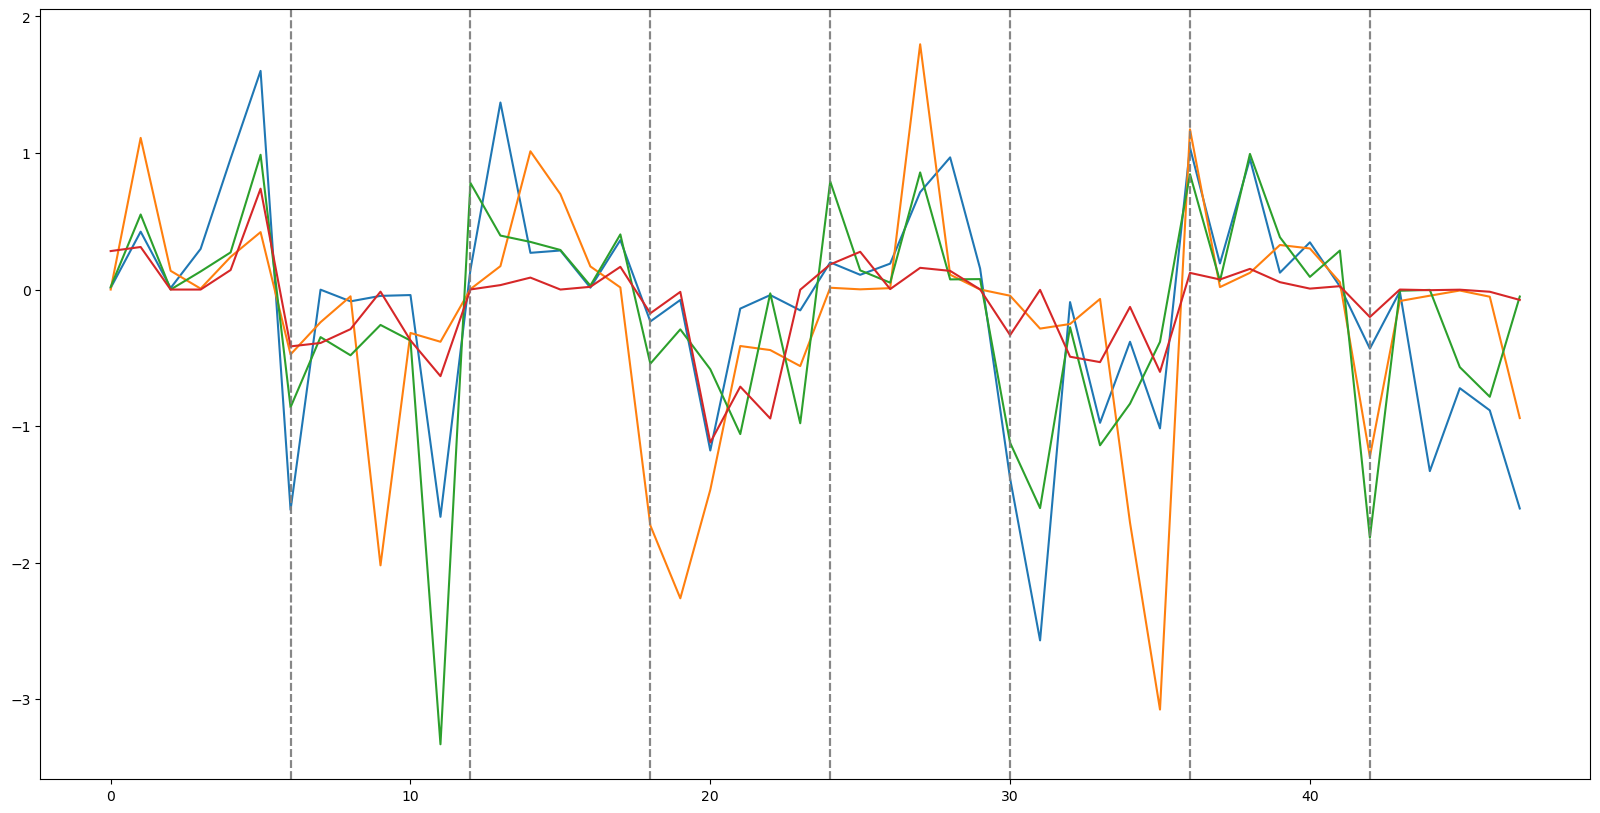

In [56]:
# plot one of the readout weights
fig = plt.figure(figsize=(20,10))
for i in range(4):
    _ = plt.plot(sum_readout_weights[1][:,i])
    # draw vertical lines every num_inh
    for j in range(num_inh, sum_readout_weights[1].shape[0], num_inh):
        _ = plt.axvline(x=j, color='gray', linestyle='--', alpha=0.5)

In [57]:
dataset.SUs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  35,  36,
        37,  38,  39,  63,  64,  65,  66,  91,  92,  93, 114, 115, 116,
       117, 118, 119, 120, 121, 122])

# plot the readout weights for each model

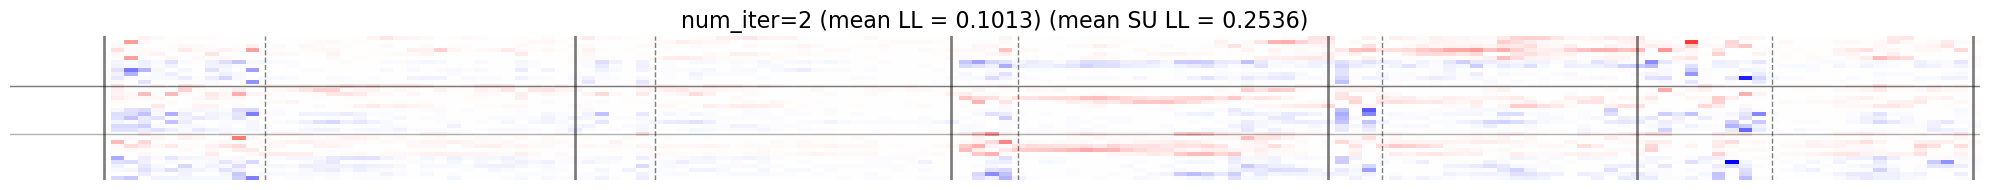

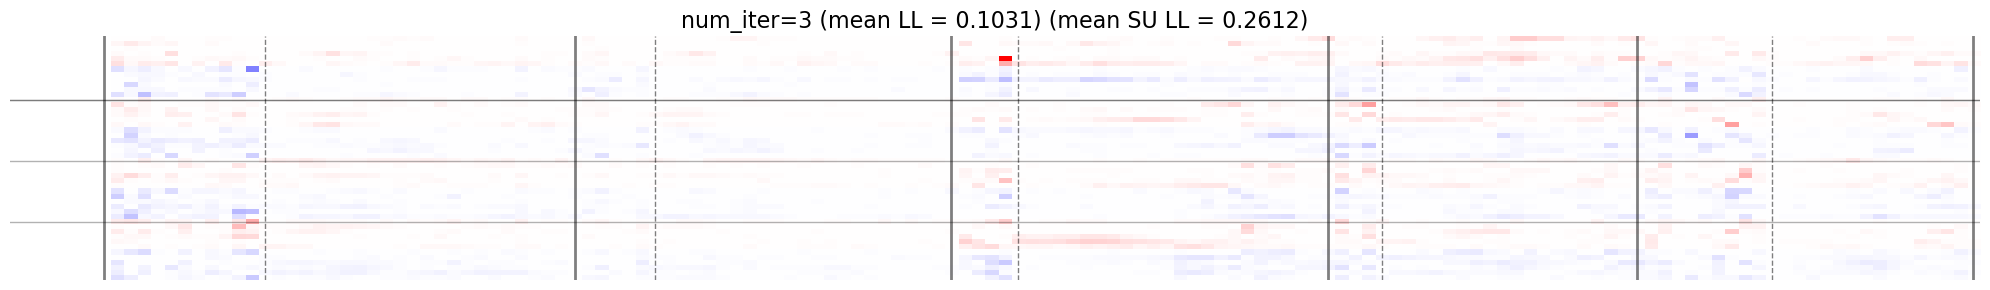

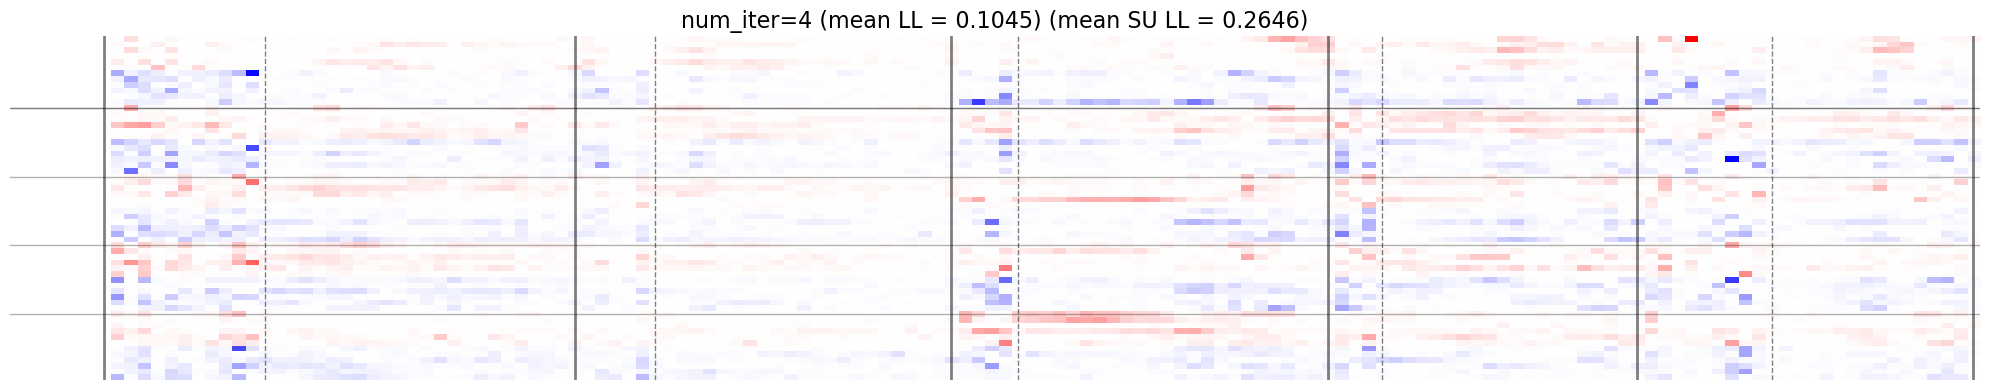

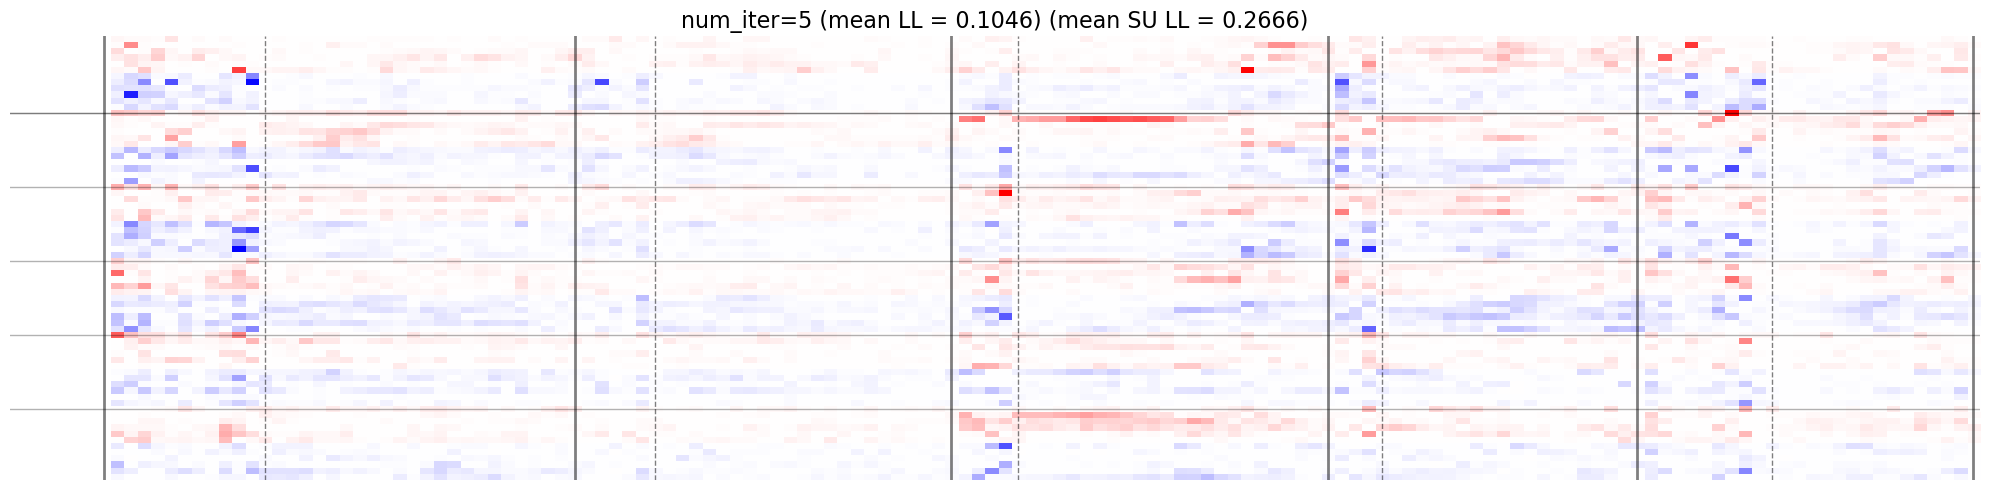

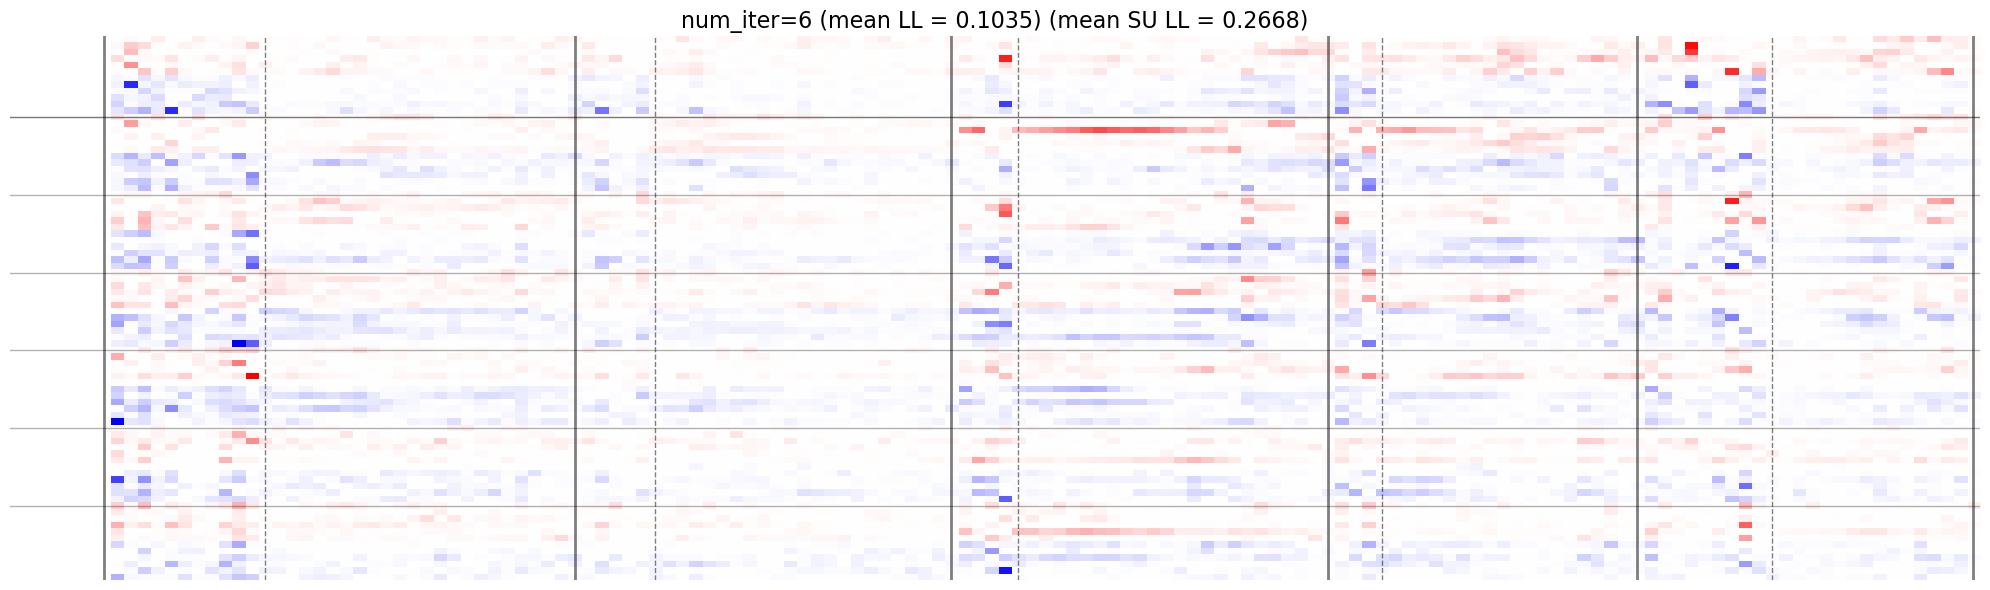

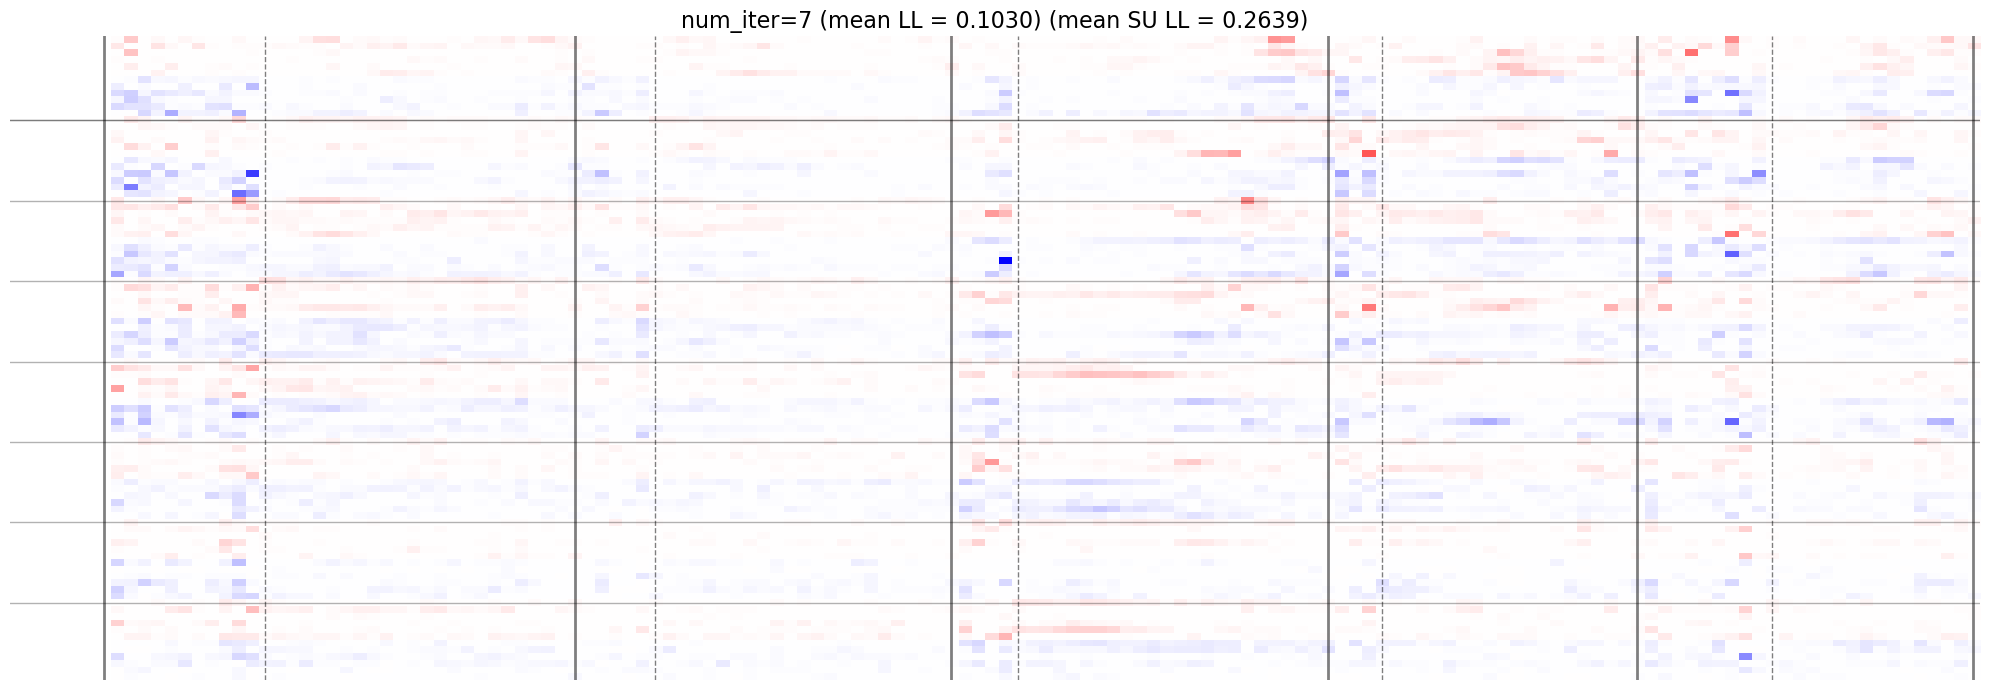

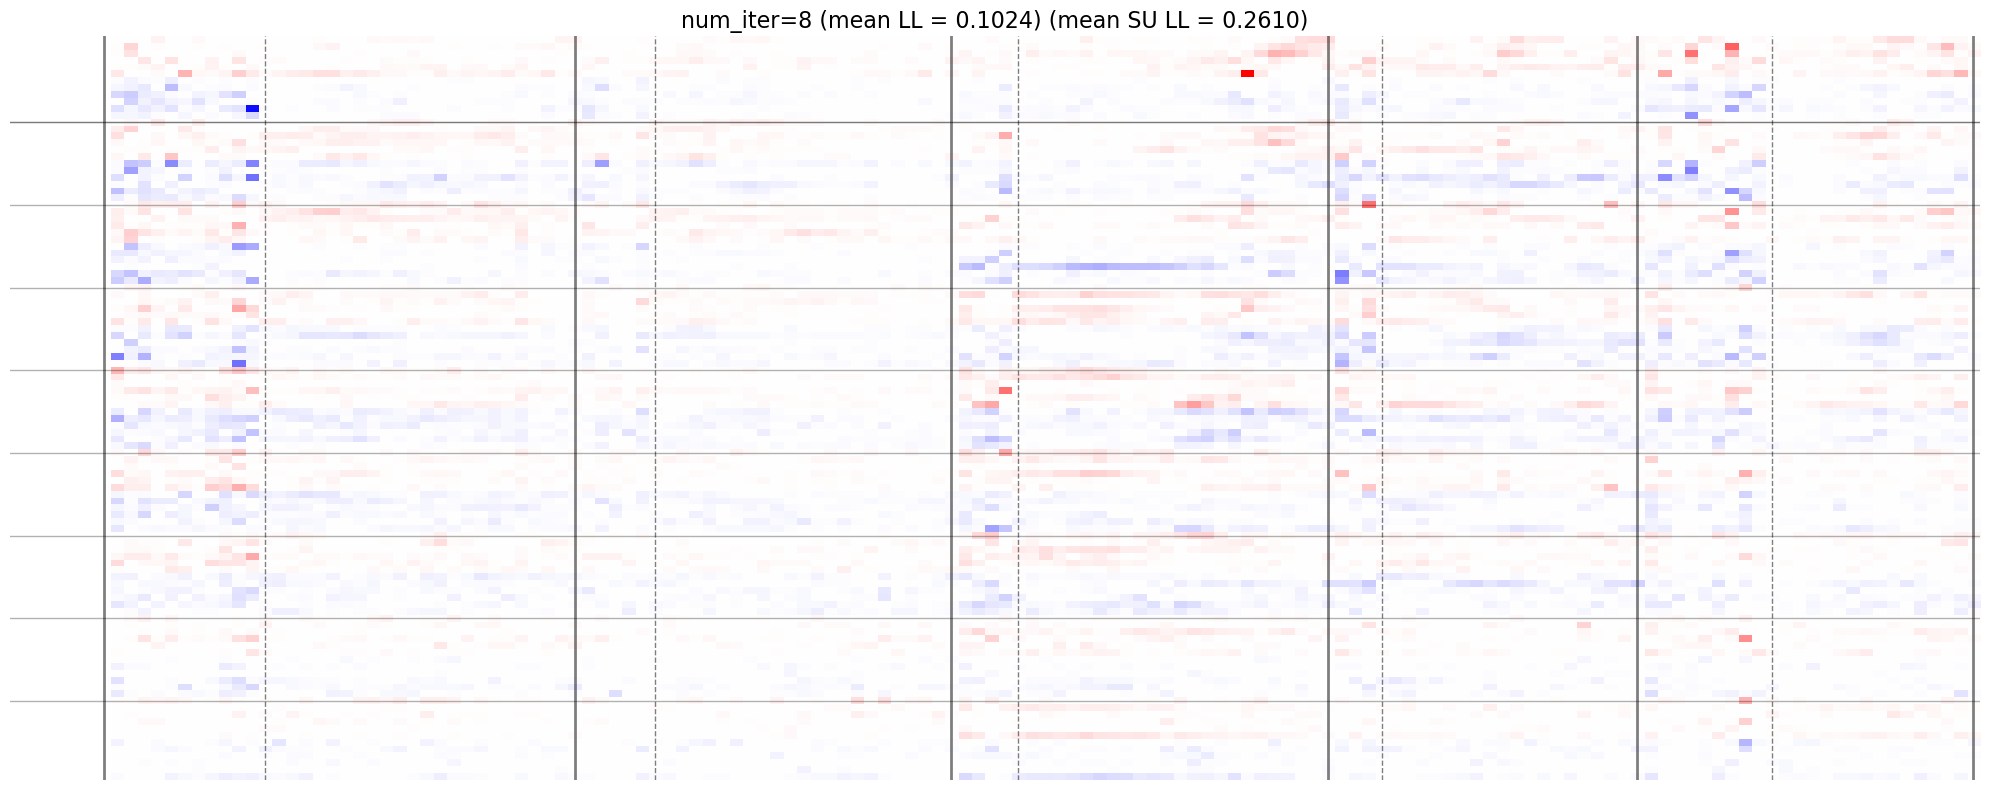

In [58]:
def plot_readout_weights(readout_weights, k, num_subunits, num_inh, model_names, figsize=(20,5)):
    # get the mean LLs for just the SUs in k
    mean_SU_LLs = np.mean(best_trials[k].LLs[dataset.SUs])
    
    if model_names is None:
        model_names = [str(i) for i in range(len(readout_weights))]
    
    # get the mean LLs for k
    mean_LLs = np.mean(best_trials[k].LLs)
    
    fig = plt.figure(figsize=figsize)
    plot.imagesc(readout_weights[k], cmap='bwr', colrow=False, origin='upper')
    plt.title(model_names[k] + ' (mean LL = %.4f)' % mean_LLs + ' (mean SU LL = %.4f)' % mean_SU_LLs, fontsize=16)
    plt.axis('off')

    # put a vertical line between each experiment
    for expt_boundary in expt_boundaries:
        plt.axvline(expt_boundary-1, color='k', linewidth=2, alpha=0.5)
        
    # put a vertical line between the SUs and the MUs
    # get the indices of the SUs where the experiment boundaries are
    SU_boundaries = np.where(np.diff(dataset.SUs) > 1)[0]
    
    for SU_boundary in SU_boundaries:
        plt.axvline(dataset.SUs[SU_boundary]+1, color='k', linewidth=1, alpha=0.5, linestyle='--')
    # plot the last SU boundary
    plt.axvline(dataset.SUs[-1]+1, color='k', linewidth=1, alpha=0.5, linestyle='--')

    # put a horizontal line between each layer
    layer_boundaries = [num_subunits]
    for layer in range(1, num_iter+1):
        layer_boundaries.append(layer*int(num_subunits))
    for layer_boundary in layer_boundaries:
        plt.axhline(layer_boundary, color='k', linewidth=1, alpha=0.3)

    plt.tight_layout()
    plt.show()
    
for k, num_iter in zip(range(len(center_readout_weights)), num_iterses):
    plot_readout_weights(sum_readout_weights, k, num_subunits=num_subunits, num_inh=num_inh, model_names=['num_iter='+str(iter) for iter in num_iterses], figsize=(20,num_iter))

# cluster the weights by neuron

In [10]:
def plot_cluster_readout_weights(readout_weights, k, figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    expts = range(1, len(expt_boundaries))
    colors = ['red', 'orange', 'green', 'blue', 'black']
    print(list(zip(colors, expts)))
    # get the readout weights for the first key
    readout_weights_k = readout_weights[k].T
    
    # scale the weights
    scaled_readout_weights_k = StandardScaler().fit_transform(readout_weights_k)

    # cluster the weights
    clusterable_embedding = umap.UMAP(
        n_components=2,
        random_state=42
    ).fit_transform(scaled_readout_weights_k)

    # color by the experiment they came from
    expt_colors = np.zeros(readout_weights_k.shape[0])
    for i in range(len(expt_boundaries)-1):
        expt_colors[expt_boundaries[i]:expt_boundaries[i+1]] = i

    cmap = matplotlib.colors.ListedColormap(colors)

    # plot the clusters
    plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1], s=30, c=expt_colors, cmap=cmap)
    plt.title(k)
    plt.show()

[('red', 1), ('orange', 2), ('green', 3), ('blue', 4), ('black', 5)]


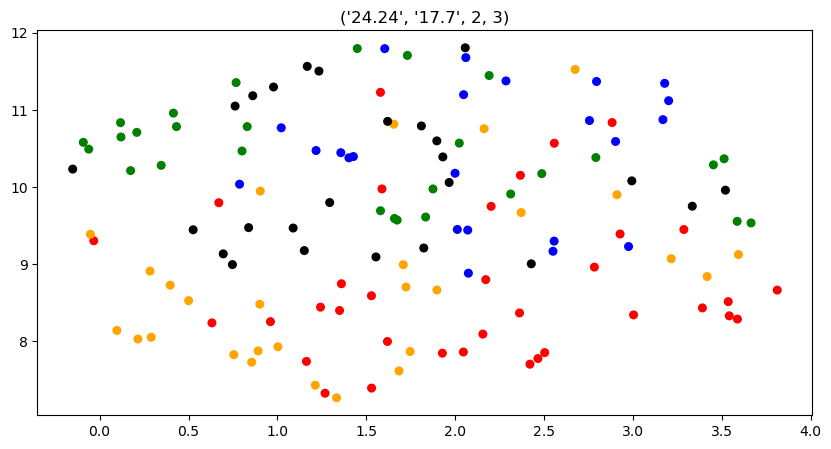

[('red', 1), ('orange', 2), ('green', 3), ('blue', 4), ('black', 5)]


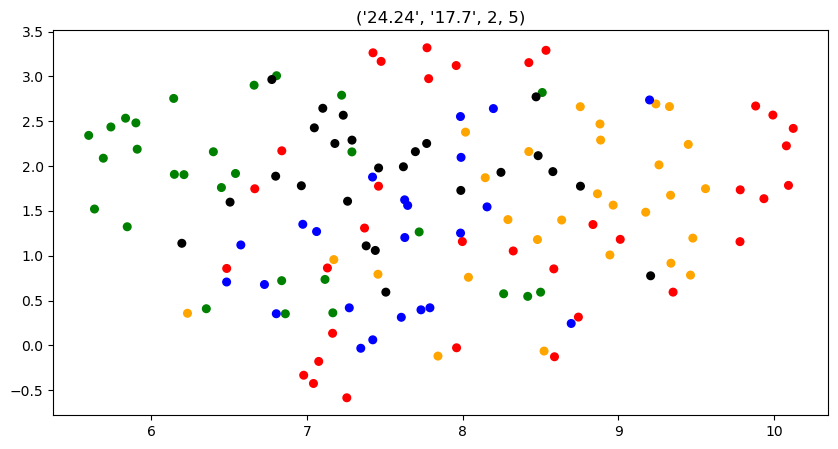

[('red', 1), ('orange', 2), ('green', 3), ('blue', 4), ('black', 5)]


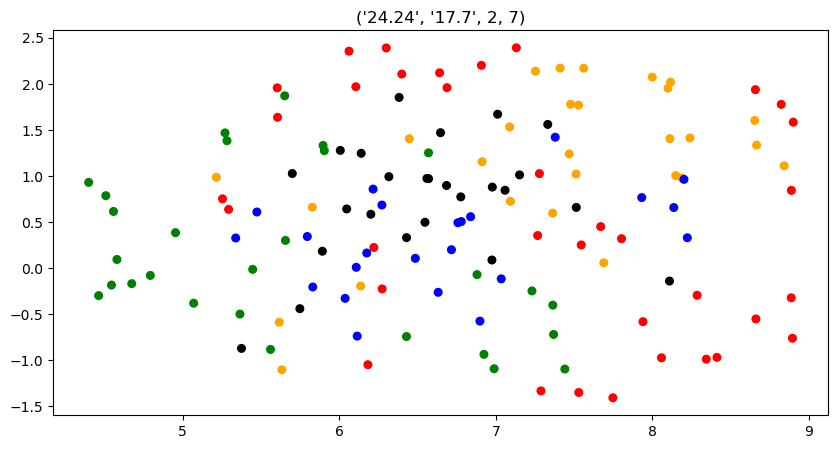

[('red', 1), ('orange', 2), ('green', 3), ('blue', 4), ('black', 5)]


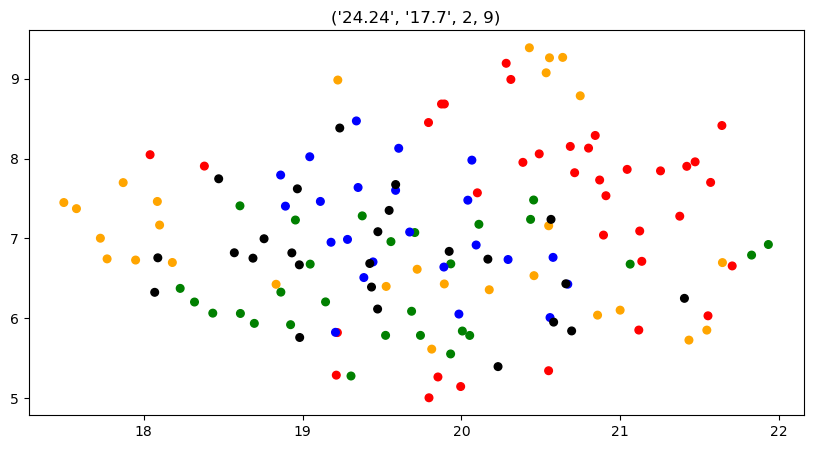

In [11]:
# cluster the neurons by their weights using UMAP
for k in center_readout_weights.keys():
    plot_cluster_readout_weights(center_readout_weights, k)

# plot STAs

(36, 20, 139)


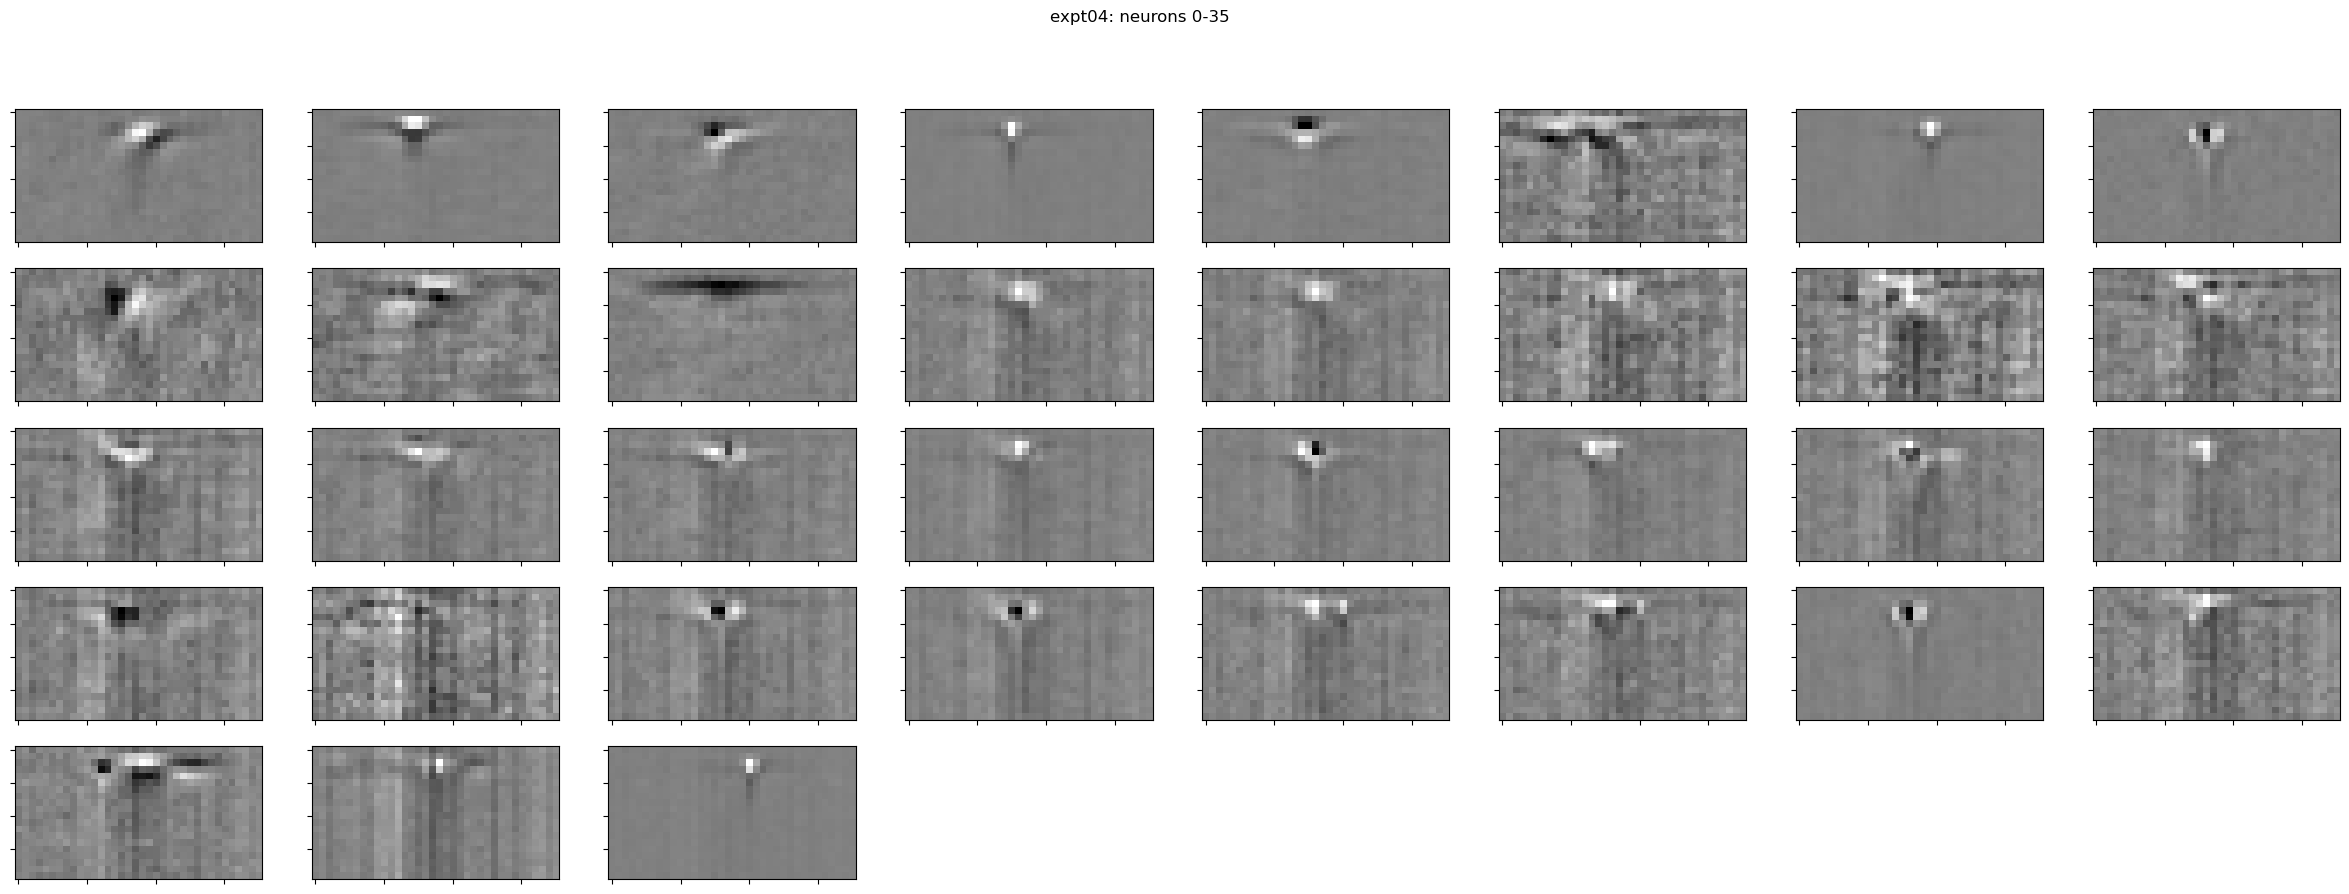

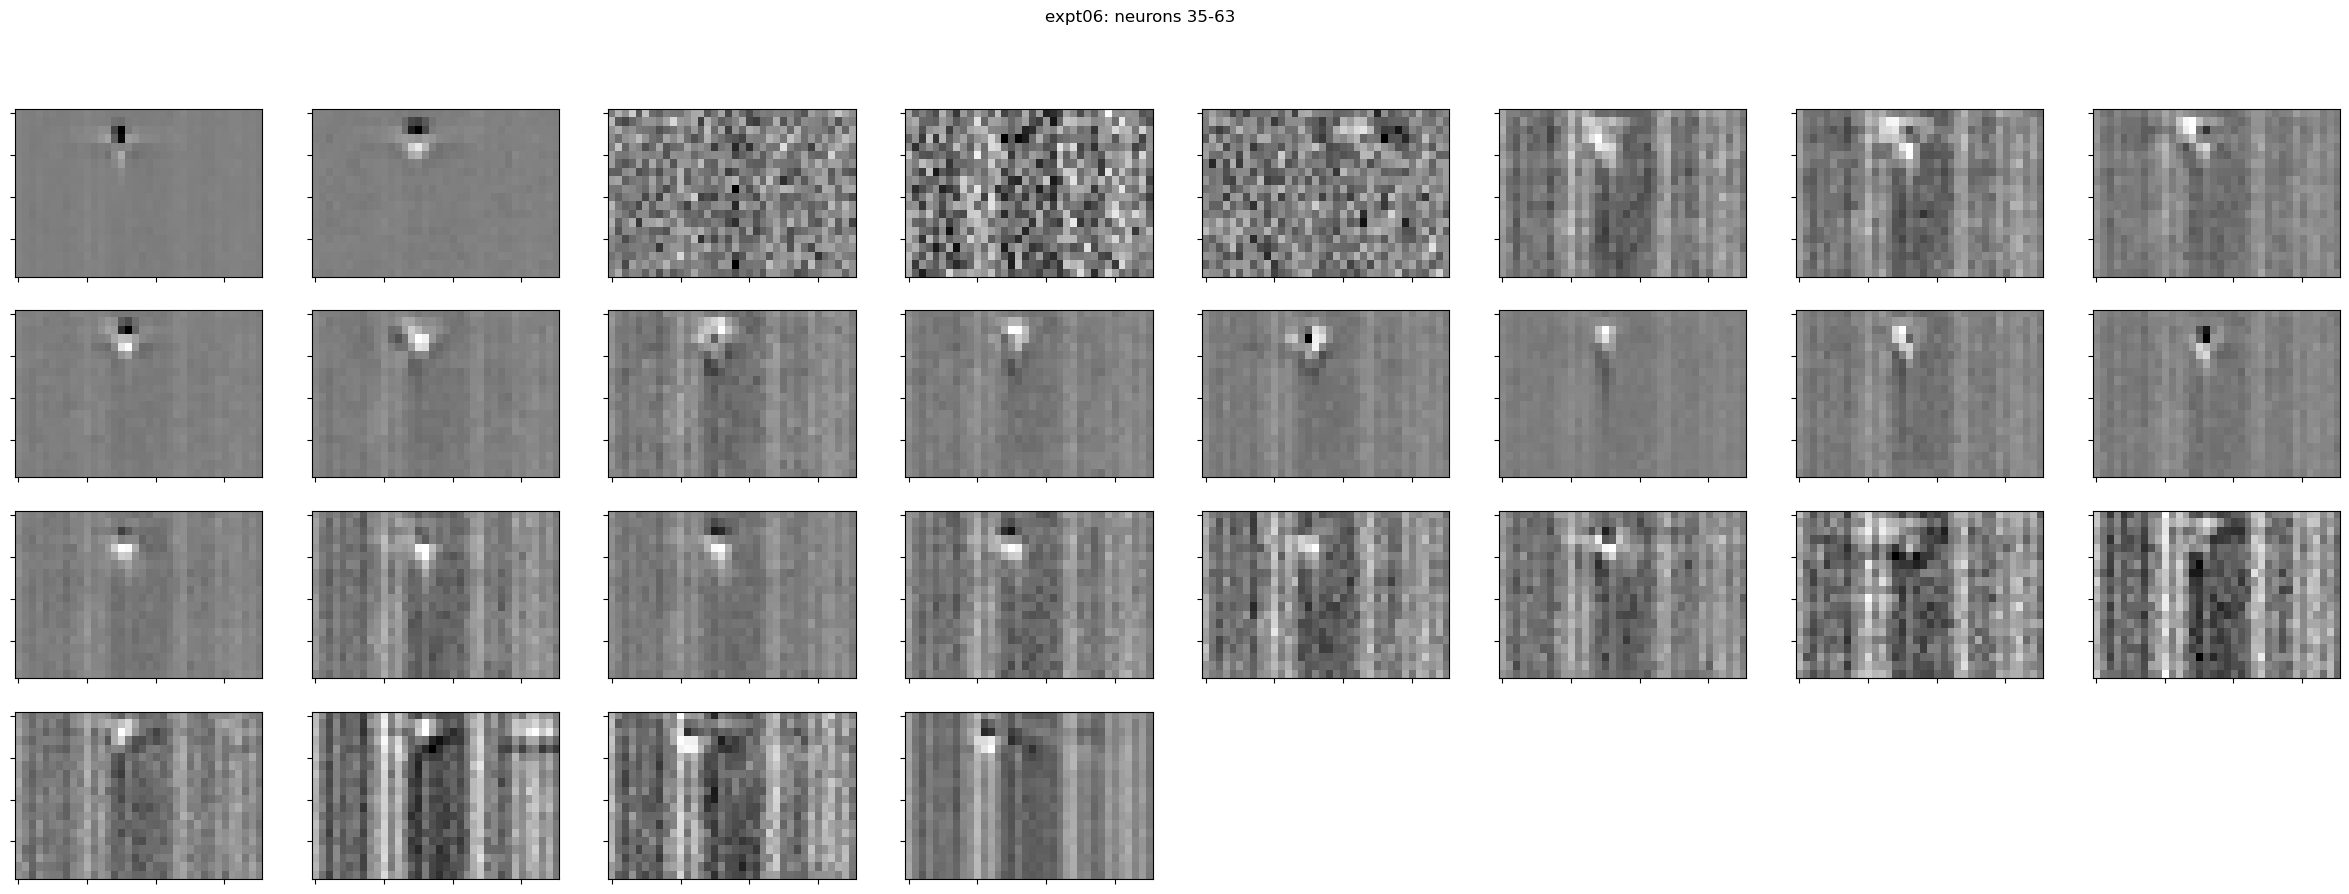

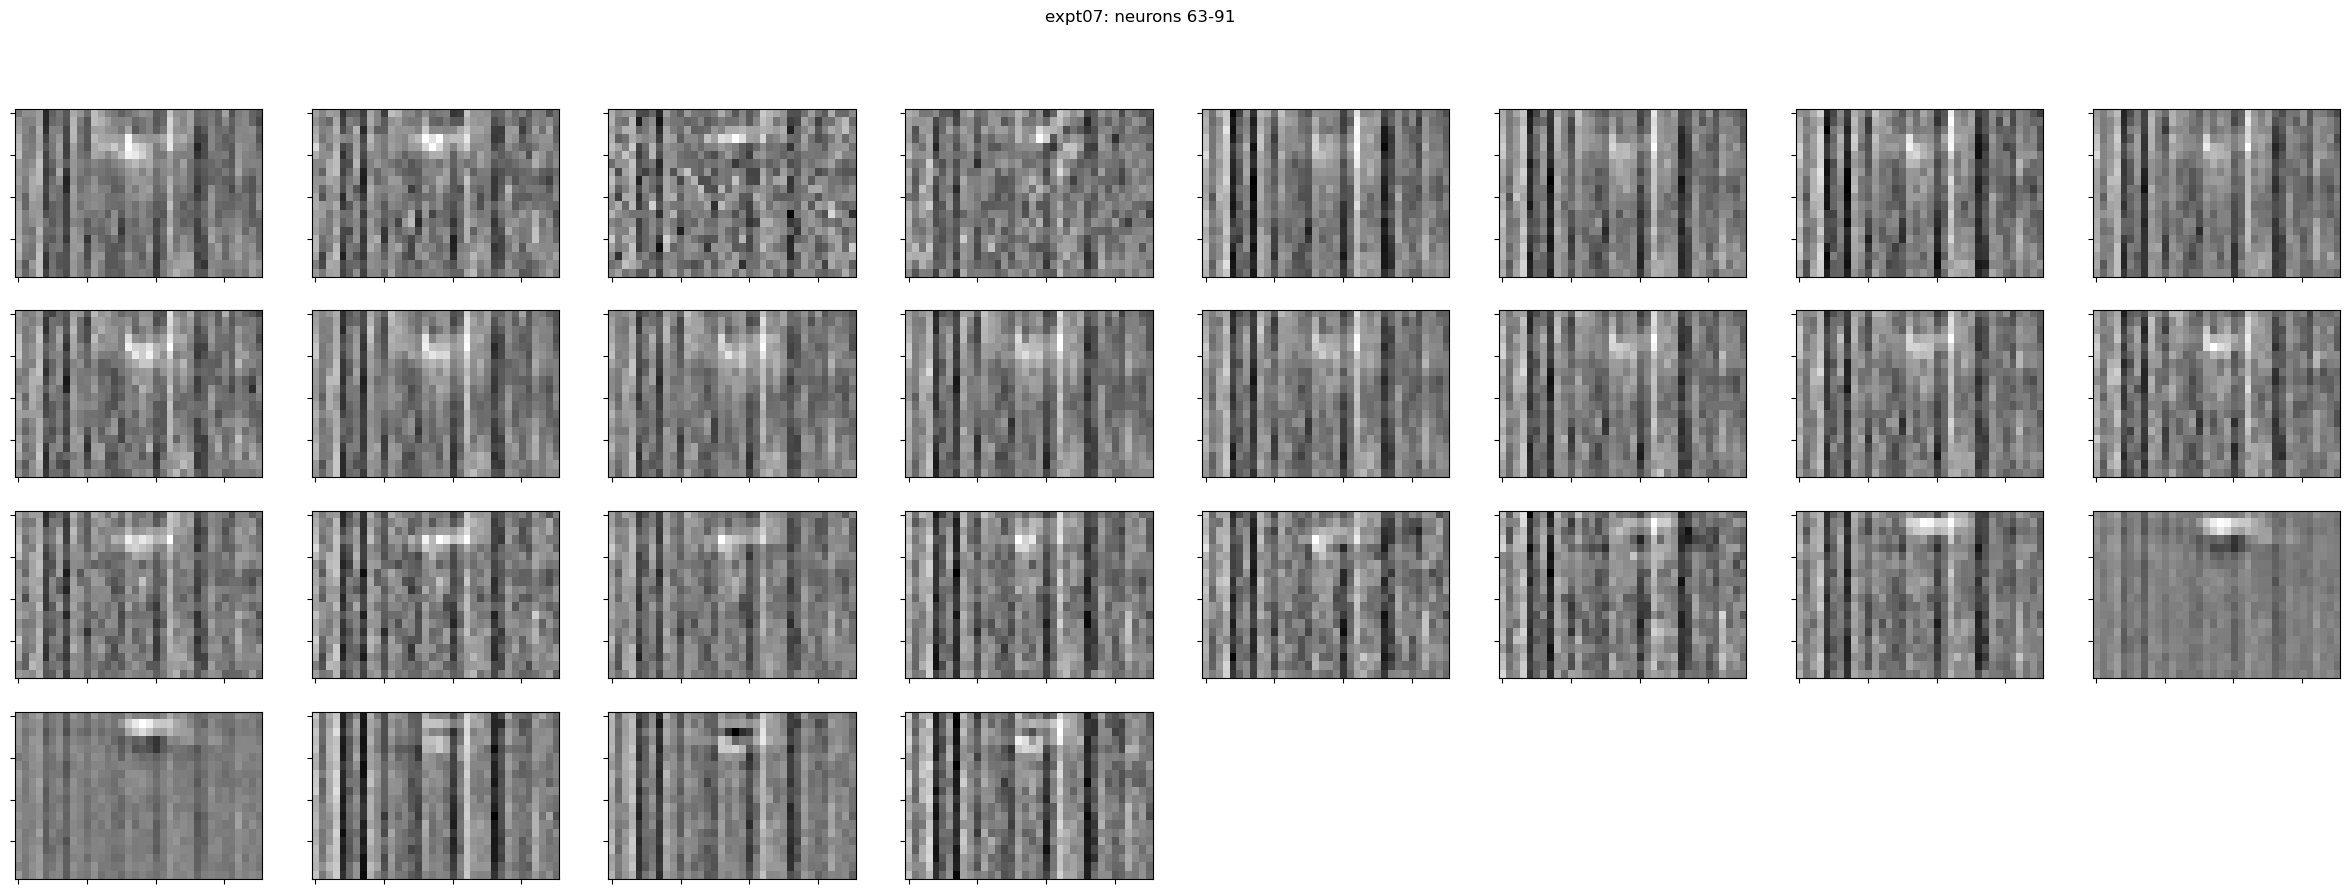

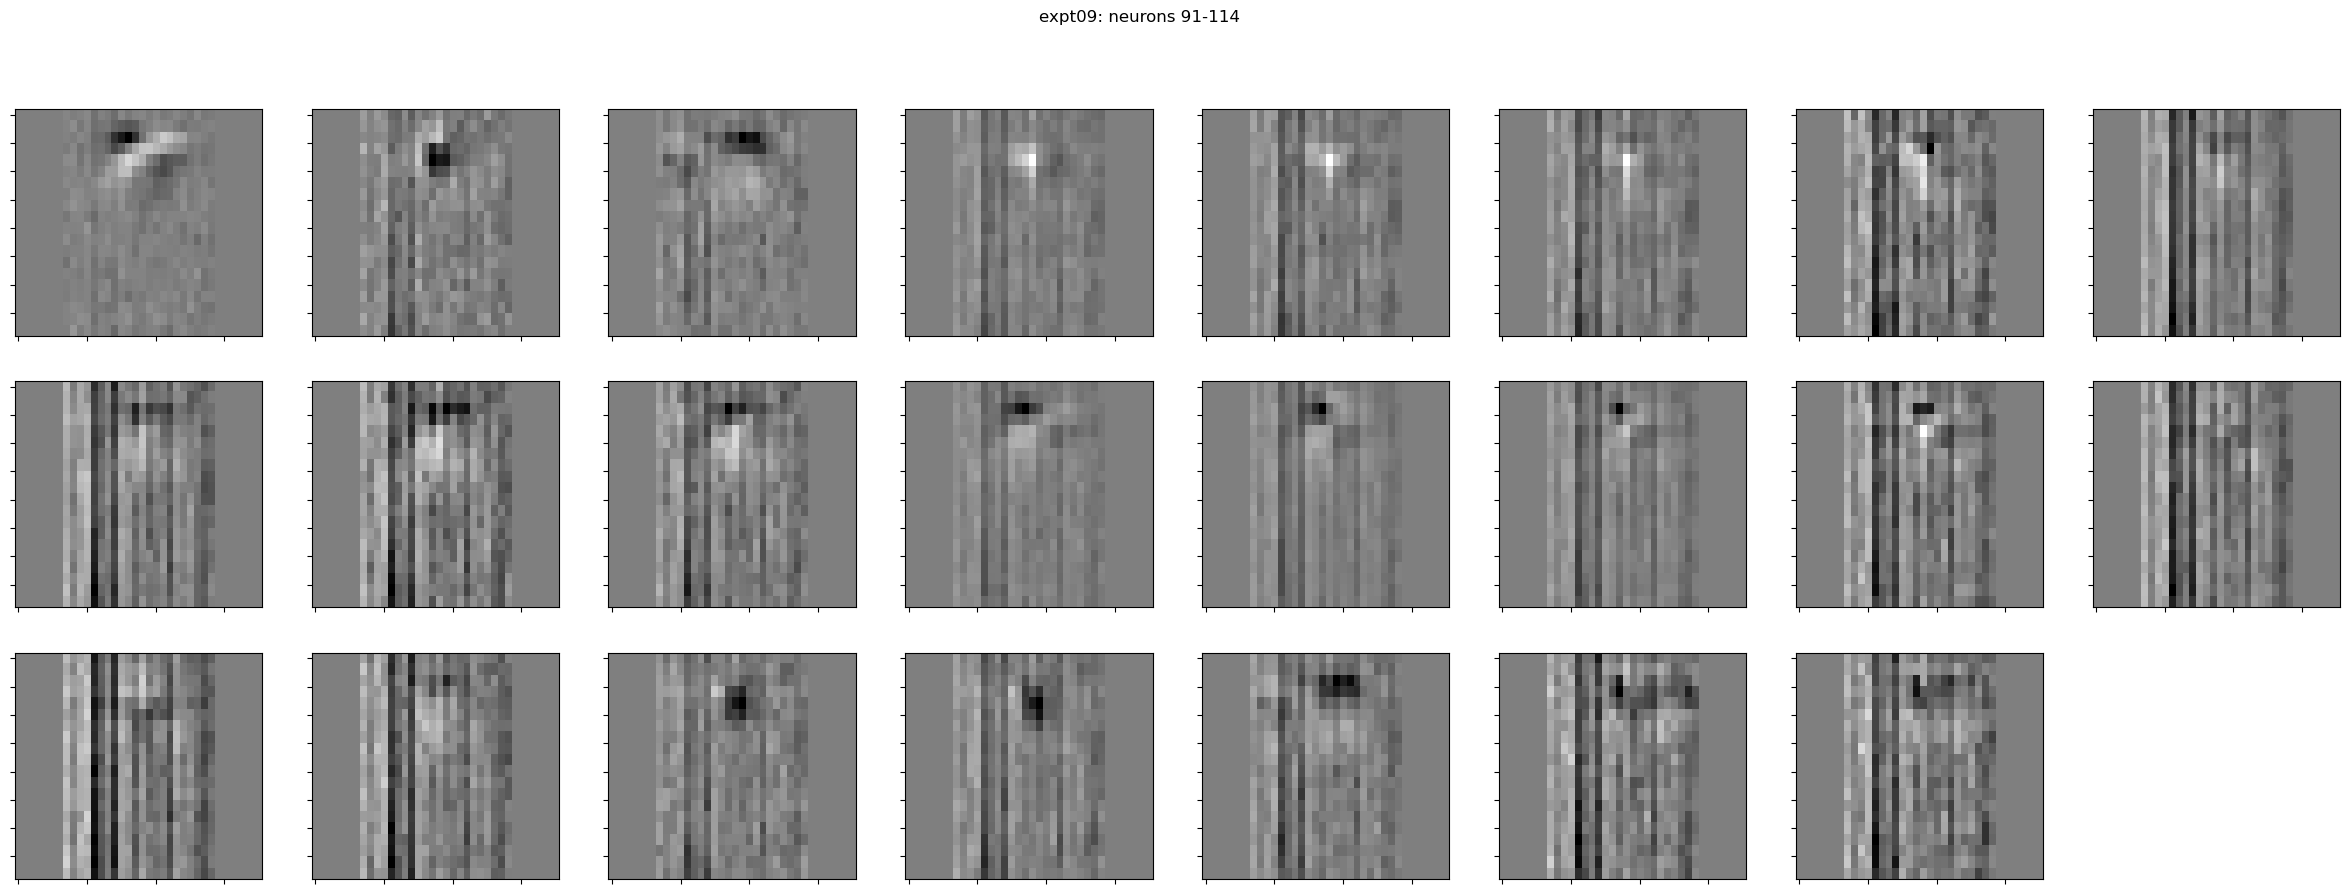

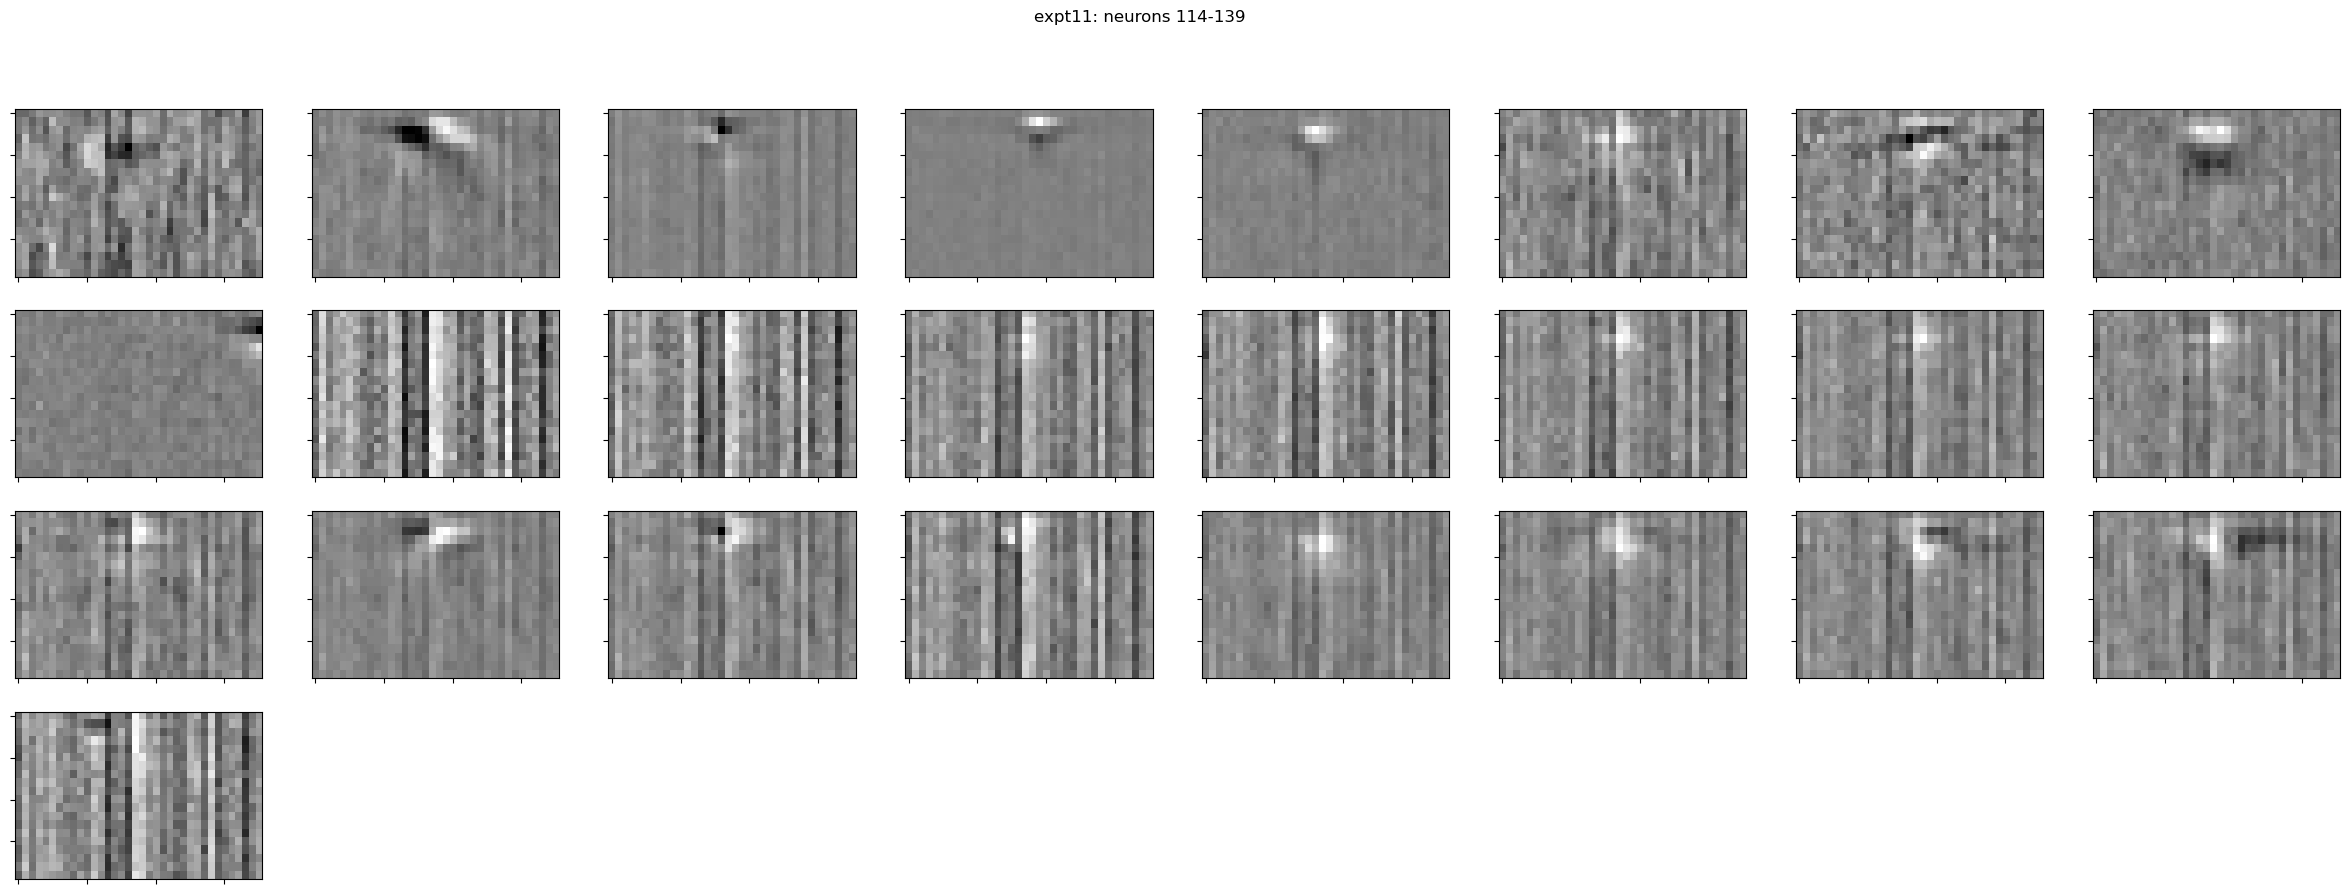

In [12]:
# Calculate STA
num_lags = 20
Reff = dataset.robs * dataset.dfs
nspks = torch.sum(Reff, axis=0)
stas = (dataset.stim.T@dataset.robs / nspks).reshape([-1, num_lags, dataset.NC]).detach().numpy()
print(stas.shape)

# plot first 6 STAs
for expti in range(len(expt_boundaries)-1):
    fig = plt.figure(figsize=(30, 10))
    fig.suptitle(expts[expti]+': neurons '+str(expt_boundaries[expti])+'-'+str(expt_boundaries[expti+1]))
    for i, cc in enumerate(range(expt_boundaries[expti], expt_boundaries[expti+1])):
        expt_len = expt_boundaries[expti+1] - expt_boundaries[expti]
        plt.subplot(expt_len//8+1, 8, i+1)
        plot.imagesc(stas[:, :, cc], aspect='auto', cmap='gray_r', colrow=True, axis_labels=False)

# reweight the subunits

In [13]:
# # reweight the subunits by their connection to the readout layer
# # get the readout layer weights
# readout_weights = model.networks[1].layers[0].weights
# # get the subunit weights
# subunit_weights = model.networks[0].layers[0].weights
# 
# # swap the last and first axes of the subunit weights
# subunit_weights = np.swapaxes(subunit_weights, 0, 2)
# 
# # reweight the subunits
# reweighteds = [] # layer, neuron, subunit
# for neuron in range(11):
#     reweighted_layer = []
#     for layer in range(5):
#         reweighted_neuron = []
#         for i,readout_weight in enumerate(readout_weights[20:30,15,neuron]):
#             reweighted = readout_weight * subunit_weights[i,:,:]
#             reweighted_neuron.append(reweighted)
#         reweighted_layer.append(reweighted_neuron)
#     reweighteds.append(reweighted_layer)
# 
# # get the min and max of the reweighted subunits
# imax = np.max(reweighteds)
# imin = -imax
# print('max: ', imax, 'min: ', imin)
# 
# # plot the reweighted subunits for neuron 1
# fig, axs = plt.subplots(5,10, figsize=(20,6))
# for layer in range(5):
#     for i,reweighted in enumerate(reweighteds[layer][1]):
#         ax = axs[layer,i]
#         ax.imshow(reweighted, cmap='gray', origin='lower', vmin=imin, vmax=imax)
#         ax.axis('off')
# plt.tight_layout()
# plt.suptitle('Reweighted Subunits for Neuron 1', fontsize=20)
# # put spacing between the title and the subplots
# plt.subplots_adjust(top=0.85)
# # label the super axes large font
# fig.text(0.5, 0, 'Subunit', ha='center', va='center', fontsize=16)
# fig.text(0, 0.5, 'Layer', ha='center', va='center', rotation='vertical', fontsize=16)
# plt.show()